In [1]:
import scipy.integrate
import numpy as np
import pandas as pd

In [2]:
R0 =  2.2 #2.2 #Reproduction number
D_incubation =  5.2 #Length of incubation period
D_infectious =  1 # Duration patient is infectious
population =  1380004000 # 1,38,00,04,000 # Source WHO 2020 

In [3]:
def model(y, t, D_inf = D_infectious, Rt = R0):
    # :param array y: S E I R values
    # :param array t: Time array (days)
    
    N = population
    beta = Rt / D_inf
    sigma = 1 / D_incubation
    gamma = 1 / D_inf
    
    S, E, I, R = y
    
    dS = -beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I

    return ([dS, dE, dI, dR])

In [4]:
def solve(model, population, E0, D_inf, Rt):
    T = np.arange(365)
    Y0 = population - E0, E0, 0, 0 # S, E, I, R at initial step

    y_data_var = scipy.integrate.odeint(model, Y0, T, args=(D_inf, Rt))
    S, E, I, R = y_data_var.T  # transpose and unpack
    return T, S, E, I, R

In [5]:
print("Plotting the variation of initial infected population")
for initp in [1,100,1000,10000]:
    X, S, E, I, R = solve(model, population, initp, D_infectious, R0)
    i_peak = np.amax(I)
    day = np.where(i_peak == I)
    print("Initial Population =", initp, "Peak day =" ,day[0][0], "Peak infected =", f"{i_peak:,.0f}", "Peak Death =", f"{(i_peak*0.03):,.0f}")
    

Plotting the variation of initial infected population
Initial Population = 1 Peak day = 125 Peak infected = 41,470,116 Peak Death = 1,244,103
Initial Population = 100 Peak day = 98 Peak infected = 41,481,896 Peak Death = 1,244,457
Initial Population = 1000 Peak day = 84 Peak infected = 41,432,907 Peak Death = 1,242,987
Initial Population = 10000 Peak day = 71 Peak infected = 41,481,062 Peak Death = 1,244,432


The above table shows that the Peak day gets effected by the initial number of cases reported

Text(100, 160000000, 'Peak Exposed')

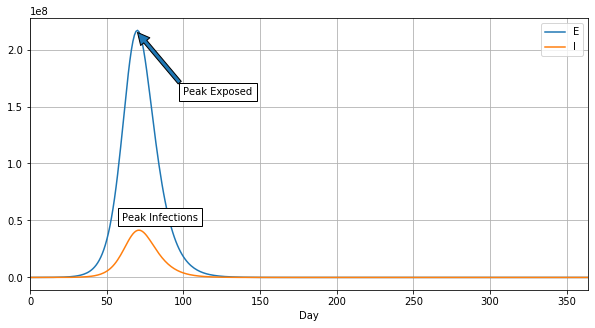

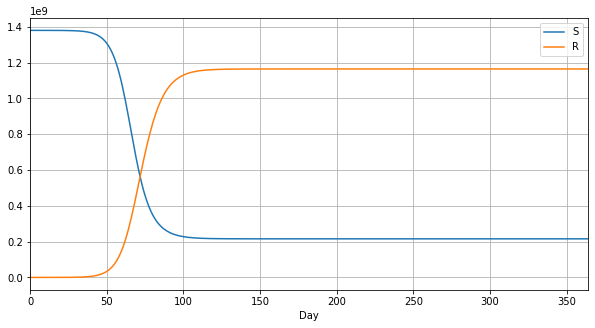

In [23]:
r = pd.DataFrame({
    "Day": X,
    "S": S,
    "E": E,
    "I": I,
    "R": R
})
ax1 = r.plot(
    x = "Day",
    y = ["E", "I"],
    grid = True,
    figsize = (10, 5)
)

# Scales are different hence plotting separately
ax2 = r.plot(
    x = "Day",
    y = ["S", "R"],
    grid = True,
    figsize = (10, 5)
)

ax1.text(60, 50000000, "Peak Infections", bbox={'facecolor':'white'})
ax1.annotate("Peak Exposed", xy=(70, 215000000), xytext=(100, 160000000), arrowprops={}, bbox={'facecolor':'white'})

In [7]:
print("Plotting the variation of R0")
for Rt in [1.1,1.4,1.5,2.0,2.2,2.5,3.0]:
    X, S, E, I, R = solve(model, population, 3, D_infectious, Rt)
    i_peak = np.amax(I)
    day = np.where(i_peak == I)
    print("R0 =", Rt, "Peak day =" ,day[0][0], "Peak infected =", f"{i_peak:,.0f}", "Peak Death =", f"{(i_peak*0.03):,.0f}")
    

Plotting the variation of R0
R0 = 1.1 Peak day = 364 Peak infected = 155 Peak Death = 5
R0 = 1.4 Peak day = 300 Peak infected = 10,093,044 Peak Death = 302,791
R0 = 1.5 Peak day = 248 Peak infected = 14,015,652 Peak Death = 420,470
R0 = 2.0 Peak day = 138 Peak infected = 34,054,931 Peak Death = 1,021,648
R0 = 2.2 Peak day = 119 Peak infected = 41,470,420 Peak Death = 1,244,113
R0 = 2.5 Peak day = 99 Peak infected = 51,696,732 Peak Death = 1,550,902
R0 = 3.0 Peak day = 79 Peak infected = 66,313,560 Peak Death = 1,989,407


In [ ]:
print("Plotting the variation of D_infectious")
for D_infectious in [1.1,1.4,1.5,2.0,2.2,2.5,3.0]:
    X, S, E, I, R = solve(model, population, 3, D_infectious, R0)
    i_peak = np.amax(I)
    day = np.where(i_peak == I)
    print("D_infectious =", D_infectious, "Peak day =" ,day[0][0], "Peak Death =", f"{(i_peak*0.03):,.0f}")
    r = pd.DataFrame({
    "Day": X,
    "S": S,
    "E": E,
    "I": I,
    "R": R
    })
    
    # Scales are different hence plotting separately
    r.plot(
        x = "Day",
        y = ["S", "R"],
        grid = True,
        #subplots = True,
        figsize = (10, 5)
    )
    